<a href="https://colab.research.google.com/github/4graf/Data_Processing/blob/main/ML/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
from itertools import combinations

X = [[1, 2],
     [0, 3],
     [-1, 1]]
    
def D(p1, p2):
    return np.sqrt(sum([(p1[i]-p2[i])**2 for i in range(len(p1))]))

in_claster_d_x = 2*sum(D(*pair) for pair in list(combinations(X, 2)))
print(in_claster_d_x)

in_claster_d_x/len(X)

11.772699034745349


3.924233011581783

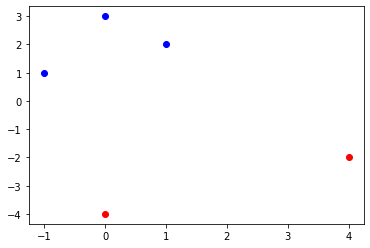

In [ ]:
X2 = [[0, -4],
     [4, -2]]
    
plt.scatter([row[0] for row in X], [row[1] for row in X], c='blue')
plt.scatter([row[0] for row in X2], [row[1] for row in X2], c='red')


In [ ]:
in_claster_d_x2 = 2*sum(D(*pair) for pair in list(combinations(X2, 2)))
print(in_claster_d_x2)

in_claster_d_x2/len(X)

8.94427190999916


2.9814239699997196

In [ ]:
for x in X:
    for x2 in X2:
        print(f'{x=} {x2=} {D(x, x2)=}')

x=[1, 2] x2=[0, -4] D(x, x2)=6.082762530298219
x=[1, 2] x2=[4, -2] D(x, x2)=5.0
x=[0, 3] x2=[0, -4] D(x, x2)=7.0
x=[0, 3] x2=[4, -2] D(x, x2)=6.4031242374328485
x=[-1, 1] x2=[0, -4] D(x, x2)=5.0990195135927845
x=[-1, 1] x2=[4, -2] D(x, x2)=5.830951894845301


In [ ]:
s = 0
for x in X:
    for x2 in X2:
        s += D(x, x2)

s/(len(X)*len(X2))

5.902643029361525

In [ ]:
D([0, 2], [2, -3])

5.385164807134504

In [ ]:
all = X + X2
comb = combinations(all, 2)

print(*list(f'{x[0]} _ {x[1]} = {D(x[0], x[1])}\n' for x in comb))

[1, 2] _ [0, 3] = 1.4142135623730951
 [1, 2] _ [-1, 1] = 2.23606797749979
 [1, 2] _ [0, -4] = 6.082762530298219
 [1, 2] _ [4, -2] = 5.0
 [0, 3] _ [-1, 1] = 2.23606797749979
 [0, 3] _ [0, -4] = 7.0
 [0, 3] _ [4, -2] = 6.4031242374328485
 [-1, 1] _ [0, -4] = 5.0990195135927845
 [-1, 1] _ [4, -2] = 5.830951894845301
 [0, -4] _ [4, -2] = 4.47213595499958



# SKLEARN

In [ ]:
# ! touch data.txt

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans

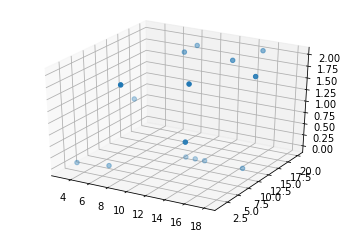

In [ ]:
df = pd.read_csv('data.txt', index_col='Object')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['X'], df['Y'], df['Cluster'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


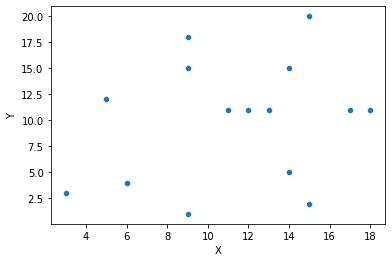

In [ ]:
sns.scatterplot(df['X'], df['Y'])

In [ ]:
X = df.drop(columns='Cluster')
cluster_true = df['Y']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


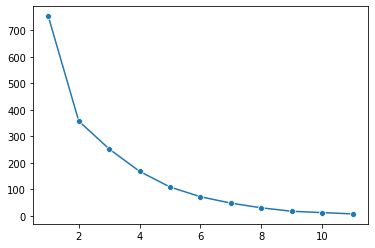

In [ ]:
k = 12
dist = [KMeans(n_clusters=k, random_state=42).fit(X).inertia_ for k in range(1, k)]

sns.lineplot(range(1, k), dist, marker='o')

In [ ]:
kmeans = KMeans(n_clusters=3, 
                init=np.array([[10.33, 8.5], [10.0, 7.0], [12.57, 12.14]]), 
                max_iter=100, n_init=1).fit(X)


In [ ]:
df['Predict_cluster'] = kmeans.labels_
df

,X,Y,Cluster,Predict_cluster
Object,,,,
1,12,11,0,2
2,5,12,1,0
3,14,15,2,2
4,3,3,0,1
5,9,1,2,1
6,11,11,0,2
7,15,2,1,1
8,6,4,0,1
9,17,11,0,2


In [ ]:
kmeans.cluster_centers_

array([[ 5.        , 12.        ],
       [ 9.4       ,  3.        ],
       [13.11111111, 13.66666667]])